In [2]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load Data set

df = pd.read_csv('/Users/arul/Documents/VASUKI/internship/Unified mentor/Telecom/Telecom Dataset.csv')

In [4]:
# Convert Binary Columns to Numeric

binary_cols = ["Blue", "Wi_Fi", "Tch_Scr", "Ext_Mem"]
df[binary_cols] = df[binary_cols].apply(pd.to_numeric, errors='coerce')


In [5]:
# Explore Dataset

df.shape   # Get number of rows and columns

(50, 17)

In [6]:
df.index  # Get row indices

RangeIndex(start=0, stop=50, step=1)

In [7]:
df.info()   # Summary (data types, non-null counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PID      50 non-null     object 
 1   Blue     0 non-null      float64
 2   Wi_Fi    0 non-null      float64
 3   Tch_Scr  0 non-null      float64
 4   Ext_Mem  0 non-null      float64
 5   Px_h     50 non-null     int64  
 6   Px_w     50 non-null     int64  
 7   Scr_h    50 non-null     int64  
 8   Scr_w    50 non-null     int64  
 9   PC       50 non-null     int64  
 10  FC       50 non-null     int64  
 11  Int_Mem  50 non-null     int64  
 12  Bty_Pwr  50 non-null     int64  
 13  RAM      50 non-null     int64  
 14  Depth    50 non-null     int64  
 15  Weight   50 non-null     int64  
 16  Price    50 non-null     int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 6.8+ KB


In [8]:
df.columns   # Get column names

Index(['PID', 'Blue', 'Wi_Fi', 'Tch_Scr', 'Ext_Mem', 'Px_h', 'Px_w', 'Scr_h',
       'Scr_w', 'PC', 'FC', 'Int_Mem', 'Bty_Pwr', 'RAM', 'Depth', 'Weight',
       'Price'],
      dtype='object')

In [9]:
df.head()  # Look at first few rows

,PID,Blue,Wi_Fi,Tch_Scr,Ext_Mem,Px_h,Px_w,Scr_h,Scr_w,PC,FC,Int_Mem,Bty_Pwr,RAM,Depth,Weight,Price
0,AAB346A,NaN,NaN,NaN,NaN,780,460,3,1,2,2,8,2800,2,7,320,3297
1,AAC347I,NaN,NaN,NaN,NaN,780,560,2,1,4,2,8,3000,2,7,280,4500
2,BAB657J,NaN,NaN,NaN,NaN,840,720,2,1,4,2,8,3300,2,7,400,4898
3,BBD456K,NaN,NaN,NaN,NaN,1280,1120,5,3,6,2,32,3000,2,3,300,6900
4,CCP761U,NaN,NaN,NaN,NaN,1280,1080,4,3,6,2,16,3000,2,3,210,5600


In [ ]:
# Feature Engineering – Screen Resolution



# Create a new feature called "Px" which stores the total resolution of the screen.

# Assuming:

# "Px_h" = height of screen in pixels

# "Px_w" = width of screen in pixels


In [10]:
#  Create Px (Total Pixel Resolution)

df["Px"] = df["Px_h"] * df["Px_w"]


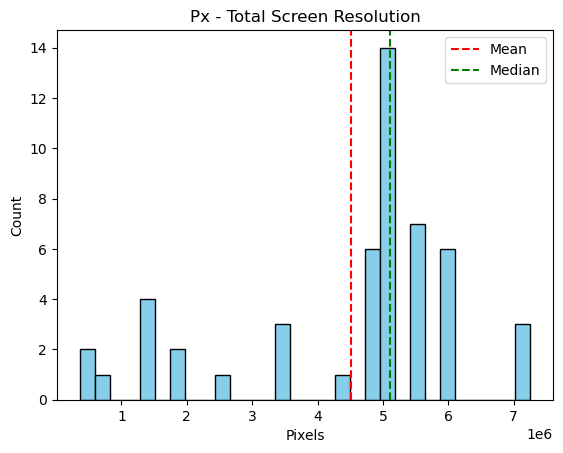

In [11]:
# Histogram of "Px" (Total Pixel Resolution)

plt.hist(df["Px"], bins=30, color='skyblue', edgecolor='black')
plt.axvline(df["Px"].mean(), color='red', linestyle='dashed', label='Mean')
plt.axvline(df["Px"].median(), color='green', linestyle='dashed', label='Median')
plt.title("Px - Total Screen Resolution")
plt.xlabel("Pixels")
plt.ylabel("Count")
plt.legend()
plt.show()

In [12]:
# Filter phones with resolution ≥ median
# (Condition: Px ≥ median)

con2 = df["Px"] >= df["Px"].median()

In [32]:
#  Create Scr_d (Screen Diagonal)

# Scr_h = screen height and Scr_w = screen width

df["Scr_d"] = np.sqrt(df["Scr_h"]**2 + df["Scr_w"]**2)

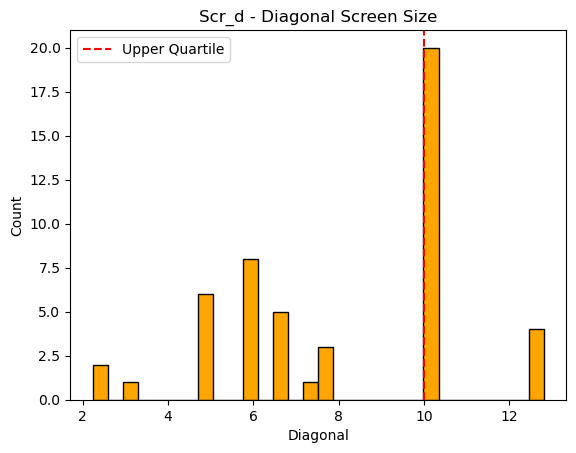

In [14]:
# Histogram of "Scr_d" with quartiles


plt.hist(df["Scr_d"], bins=30, color='orange', edgecolor='black')
plt.axvline(df["Scr_d"].quantile(0.75), color='red', linestyle='dashed', label='Upper Quartile')
plt.title("Scr_d - Diagonal Screen Size")
plt.xlabel("Diagonal")
plt.ylabel("Count")
plt.legend()
plt.show()

In [15]:
# Filter phones with screen size ≥ upper quartile (Condition: Scr_d ≥ upper quartile)

con3 = df["Scr_d"] >= df["Scr_d"].quantile(0.75)

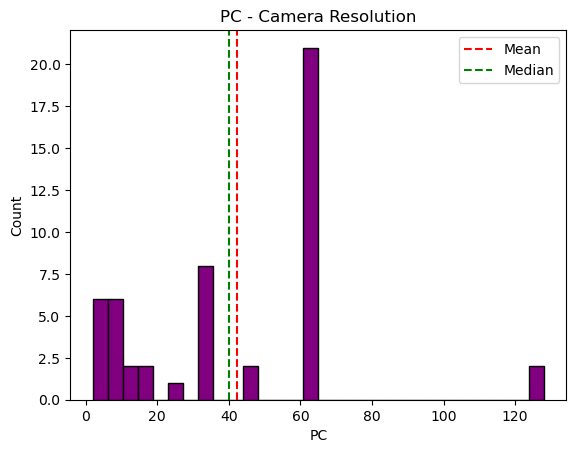

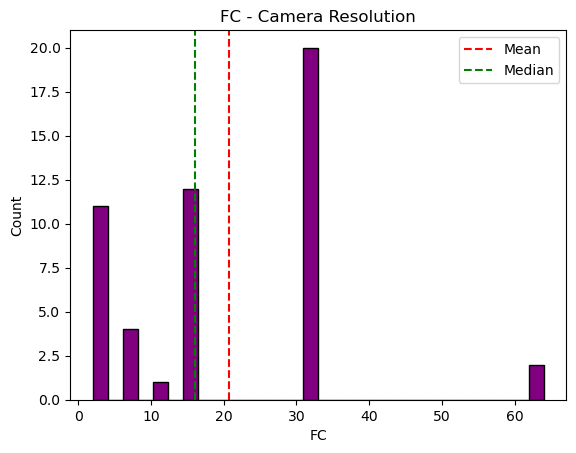

In [29]:
# Histograms of PC and FC (Primary and Front Camera)

for col in ["PC", "FC"]:
    plt.hist(df[col], bins=30,color='purple',edgecolor='black')
    plt.axvline(df[col].mean(), color='red', linestyle='dashed', label='Mean')
    plt.axvline(df[col].median(), color='green', linestyle='dashed', label='Median')
    plt.title(f"{col} - Camera Resolution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend()
    plt.show()


In [17]:
# Filter where both PC and FC ≥ their mean

con4 = (df["PC"] >= df["PC"].mean()) & (df["FC"] >= df["FC"].mean())

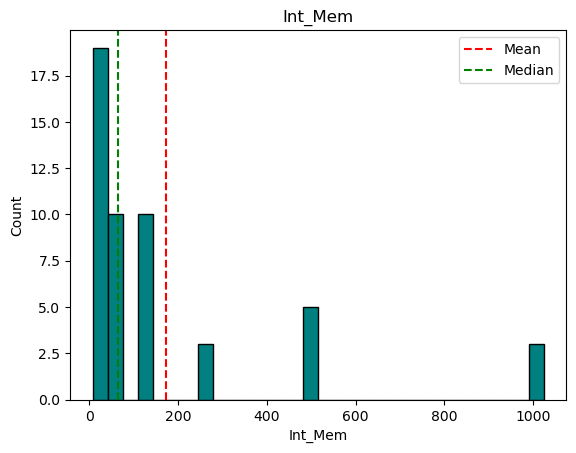

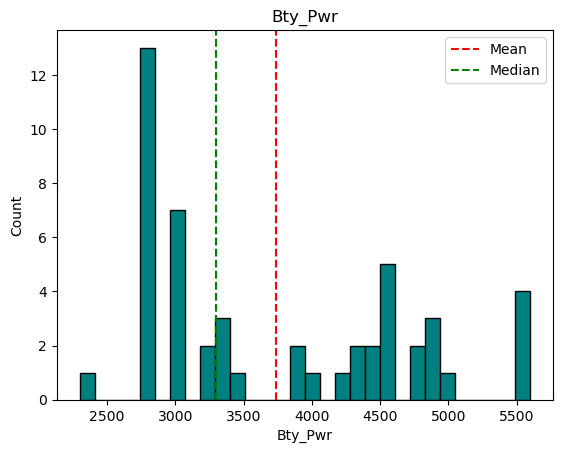

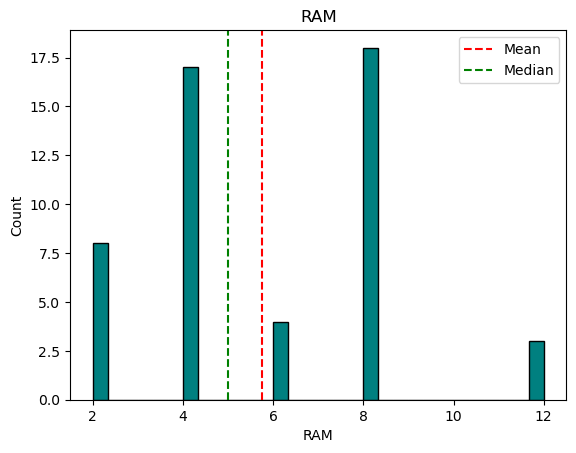

In [33]:
# Histograms of Int_Mem, Bty_Pwr, RAM

for col in ["Int_Mem", "Bty_Pwr", "RAM"]:
    plt.hist(df[col], bins=30,color='teal', edgecolor='black')
    plt.axvline(df[col].mean(), color='red', linestyle='dashed', label='Mean')
    plt.axvline(df[col].median(), color='green', linestyle='dashed', label='Median')
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend()
    plt.show()

In [19]:
# Filter where all ≥ mean

con5 = (
    (df["Int_Mem"] >= df["Int_Mem"].mean()) &
    (df["Bty_Pwr"] >= df["Bty_Pwr"].mean()) &
    (df["RAM"] >= df["RAM"].mean())
)


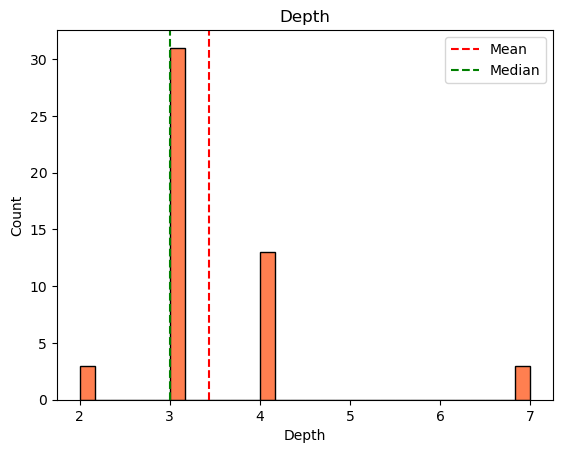

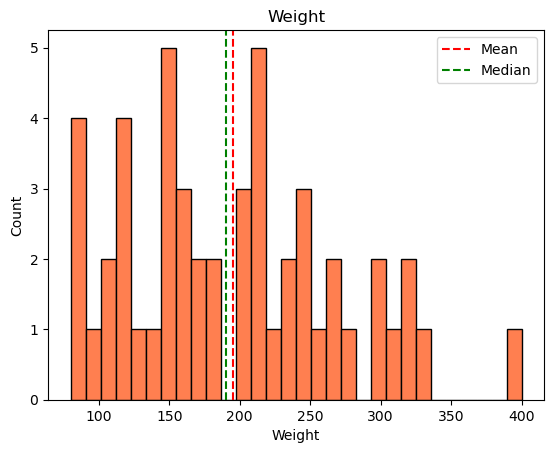

In [34]:
# Histograms of Depth and Weight

for col in ["Depth", "Weight"]:
    plt.hist(df[col], bins=30,color='coral', edgecolor='black')
    plt.axvline(df[col].mean(), color='red', linestyle='dashed', label='Mean')
    plt.axvline(df[col].median(), color='green', linestyle='dashed', label='Median')
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend()
    plt.show()


In [21]:
# Filter where both ≤ median (slim and lightweight)

con6 = (df["Depth"] <= df["Depth"].median()) & (df["Weight"] <= df["Weight"].median())


In [ ]:
#  Feature Filtering Based on Requirements


#These features are probably binary (0 = no, 1 = yes)

# "Blue" – Bluetooth

# "Wi_Fi" – WiFi

# "Tch_Scr" – Touch Screen

# "Ext_Mem" – External Memory


In [22]:
# Basic Feature Conditions (Bluetooth, WiFi, etc.)

con1 = (
    (df["Blue"] == 1) &
    (df["Wi_Fi"] == 1) &
    (df["Tch_Scr"] == 1) &
    (df["Ext_Mem"] == 1)
)

In [23]:
# Final Filtering

df1 = df[con1 & con2 & con3 & con4 & con5 & con6]
print("Filtered DataFrame shape:", df1.shape)

Filtered DataFrame shape: (0, 19)


In [24]:
# Sort by Price

df1_sorted = df1.sort_values("Price", ascending=True)
print(df1_sorted[["PID", "Price"]].head())


Empty DataFrame
Columns: [PID, Price]
Index: []


In [25]:
# Coefficient of Variation

numeric_features = df1.select_dtypes(include=[np.number])
deviations = (numeric_features.std() / numeric_features.mean()).sort_values(ascending=False)
deviations.name = "deviations"


In [26]:
# View Deviations

print("\nFeature Variability (sorted):")
print(deviations)


Feature Variability (sorted):
Blue      NaN
Wi_Fi     NaN
Tch_Scr   NaN
Ext_Mem   NaN
Px_h      NaN
Px_w      NaN
Scr_h     NaN
Scr_w     NaN
PC        NaN
FC        NaN
Int_Mem   NaN
Bty_Pwr   NaN
RAM       NaN
Depth     NaN
Weight    NaN
Price     NaN
Px        NaN
Scr_d     NaN
Name: deviations, dtype: float64


In [35]:
# Check if df1 is empty

print("df1 shape:", df1.shape)


df1 shape: (0, 19)


In [36]:
# Check individual conditions (con1 to con6)

print("con1:", df[con1].shape)
print("con2:", df[con2].shape)
print("con3:", df[con3].shape)
print("con4:", df[con4].shape)
print("con5:", df[con5].shape)
print("con6:", df[con6].shape)


con1: (0, 19)
con2: (30, 19)
con3: (24, 19)
con4: (22, 19)
con5: (9, 19)
con6: (19, 19)


In [37]:
# Relax one or more filters

# Try without con6 (depth & weight)
df1 = df[con1 & con2 & con3 & con4 & con5]


In [38]:
print("df1 shape after relaxing con6:", df1.shape)


df1 shape after relaxing con6: (0, 19)


In [39]:
# Sort in descending order (most variable features firs

numeric_features = df.select_dtypes(include=[np.number])
deviations = numeric_features.std() / numeric_features.mean()
deviations_sorted = deviations.sort_values(ascending=False)


# View the result
print(deviations_sorted)


Int_Mem    1.506514
Price      0.740868
PC         0.715716
FC         0.712184
RAM        0.479075
Scr_w      0.407624
Px         0.398680
Weight     0.388121
Scr_d      0.340469
Scr_h      0.314293
Depth      0.306072
Px_h       0.257998
Bty_Pwr    0.256368
Px_w       0.256226
Blue            NaN
Wi_Fi           NaN
Tch_Scr         NaN
Ext_Mem         NaN
dtype: float64


Insights: Top 5 Most Varied Features

Internal Memory (Int_Mem) Highest variation (1.50) → some phones have very low memory, others have a lot.
Insight: Internal memory is a major differentiator in your filtered phones. → Phones may range from 8GB to 128GB+, affecting price and usability.

Implication: Children using these phones might prefer higher internal memory to store apps, games, photos, etc.

Price Variation (0.74) → noticeable range of prices even among filtered phones.
Insight: Price is not consistent — some high-feature phones are still low-cost, and vice versa.

Implication: It’s possible to find budget-friendly phones with good specs. Sorting by price (like you did) helps recommend the best-value phones.

Primary Camera (PC) Variation (0.71) → from very basic to high-resolution primary cameras.
Insight: Some phones may offer great photo quality, others just average.

Implication: For children who enjoy photography or video recording, this feature becomes important.

Front Camera (FC) Variation (0.71) → selfie camera quality also varies widely.
Insight: There’s no standard among selected phones — some may support good-quality video calls/selfies, others might not.

Implication: You can recommend phones with better front cameras for video chatting with friends or family.

RAM Variation (0.48) → noticeable but less than the above features.
Insight: RAM affects performance and multitasking — important for games and apps.

Implication: Phones with higher RAM will give smoother performance, especially for kids who run multiple apps or play games.



In [40]:
# the visualization of the top 5 most varied features in filtered phone dataset:

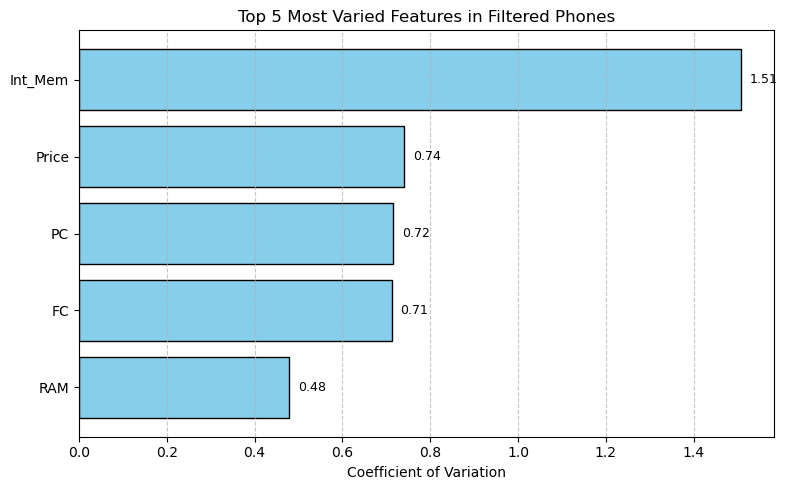

In [41]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Create dictionary of top 5 features and their variation values
top_features = {
    "Int_Mem": 1.506514,
    "Price": 0.740868,
    "PC": 0.715716,
    "FC": 0.712184,
    "RAM": 0.479075
}

# Step 3: Convert to DataFrame and sort for better display
variation_df = pd.DataFrame(list(top_features.items()), columns=["Feature", "Coefficient of Variation"])
variation_df = variation_df.sort_values("Coefficient of Variation", ascending=True)

# Step 4: Plot horizontal bar chart
plt.figure(figsize=(8, 5))
bars = plt.barh(variation_df["Feature"], variation_df["Coefficient of Variation"], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel("Coefficient of Variation")
plt.title("Top 5 Most Varied Features in Filtered Phones")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Step 5: Annotate each bar with its value
for bar in bars:
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()
